<a href="https://colab.research.google.com/github/nawaltahir/Traffic-Sign-Classification/blob/main/Traffic_Sign_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nawal Tahir**
# Traffic Sign Classification

In [ ]:
!pip install tensorflow
!pip install tensorflow keras
!pip install tensorflow sklearn
!pip install tensorflow matplotlib
!pip install tensorflow pandas
!pip install tensorflow Pillow

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

Dataset Exploration

In [ ]:

# Mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set up paths
base_dir = '/content/drive/My Drive/Train'
data = []
labels = []
classes = 43

for i in range(classes):
    path = os.path.join(base_dir, str(i))  # Use the correct Google Drive path
    if not os.path.exists(path):
        print(f"Directory for class {i} not found: {path}")
        continue  # Skip to the next class if the directory doesn't exist

    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(os.path.join(path, a))  # Use os.path.join for file paths
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(f"Error loading image {a}: {e}")

data = np.array(data)
labels = np.array(labels)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_t1, X_t2, y_t1, y_t2 = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_t1.shape, X_t2.shape, y_t1.shape, y_t2.shape)
#Converting the labels into one hot encoding
y_t1 = to_categorical(y_t1, 43)
y_t2 = to_categorical(y_t2, 43)

(39277, 30, 30, 3) (39277,)
(31421, 30, 30, 3) (7856, 30, 30, 3) (31421,) (7856,)


CNN Model

In [ ]:
image_height = 30
image_width = 30
channels = 3
# Initialize the Sequential model
model = models.Sequential()

# 1st Conv2D layer
model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(image_height, image_width, channels)))

# 2nd Conv2D layer
model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))

# MaxPooling layer
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Dropout layer
model.add(layers.Dropout(rate=0.25))

# 3rd Conv2D layer
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# 4th Conv2D layer
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# MaxPooling layer
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Dropout layer
model.add(layers.Dropout(rate=0.25))

# Flattening the layers
model.add(layers.Flatten())

# Dense Fully connected layer
model.add(layers.Dense(256, activation='relu'))

# Dropout layer
model.add(layers.Dropout(rate=0.5))

# Output layer with softmax activation
model.add(layers.Dense(43, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          11,051 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,251 (946.29 KB)

 Trainable params: 242,251 (946.29 KB)

 Non-trainable params: 0 (0.00 B)

Model Tarining and Validation

In [ ]:
eps = 15
anc = model.fit(X_t1, y_t1, batch_size=32, epochs=eps, validation_data=(X_t2, y_t2))


Epoch 1/15
982/982 ━━━━━━━━━━━━━━━━━━━━ 131s 127ms/step - accuracy: 0.3059 - loss: 3.5032 - val_accuracy: 0.8597 - val_loss: 0.4883
Epoch 2/15
982/982 ━━━━━━━━━━━━━━━━━━━━ 136s 122ms/step - accuracy: 0.7502 - loss: 0.8516 - val_accuracy: 0.9185 - val_loss: 0.3359
Epoch 3/15
982/982 ━━━━━━━━━━━━━━━━━━━━ 143s 123ms/step - accuracy: 0.8284 - loss: 0.5819 - val_accuracy: 0.9352 - val_loss: 0.2147
Epoch 4/15
982/982 ━━━━━━━━━━━━━━━━━━━━ 143s 125ms/step - accuracy: 0.8715 - loss: 0.4404 - val_accuracy: 0.9649 - val_loss: 0.1325
Epoch 5/15
982/982 ━━━━━━━━━━━━━━━━━━━━ 123s 125ms/step - accuracy: 0.8900 - loss: 0.3796 - val_accuracy: 0.9712 - val_loss: 0.1059
Epoch 6/15
982/982 ━━━━━━━━━━━━━━━━━━━━ 143s 126ms/step - accuracy: 0.9081 - loss: 0.3240 - val_accuracy: 0.9717 - val_loss: 0.0986
Epoch 7/15
982/982 ━━━━━━━━━━━━━━━━━━━━ 122s 124ms/step - accuracy: 0.9109 - loss: 0.3036 - val_accuracy: 0.9787 - val_loss: 0.0819
Epoch 8/15
982/982 ━━━━━━━━━━━━━━━━━━━━ 123s 125ms/step - accuracy: 0.9290 -

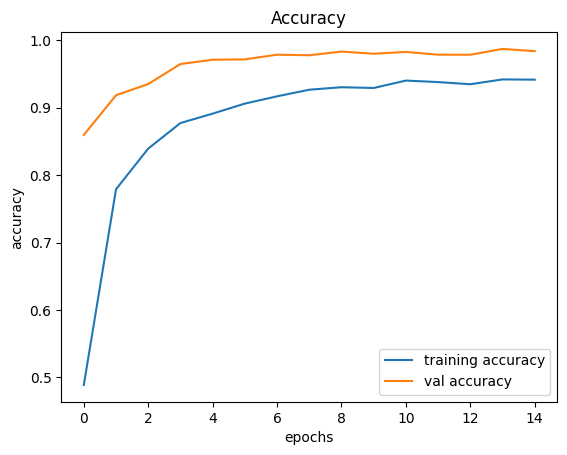

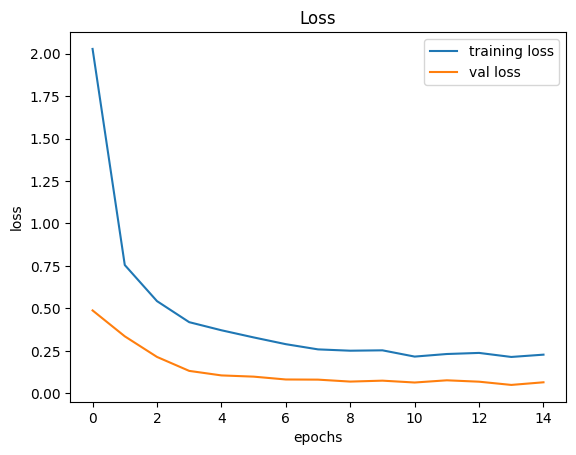

In [ ]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(anc.history['accuracy'], label='training accuracy')
plt.plot(anc.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(anc.history['loss'], label='training loss')
plt.plot(anc.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Model Testing

In [ ]:
import pandas as pd
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('/content/drive/MyDrive/Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
base_path = '/content/drive/MyDrive/'
for img in imgs:
   img = os.path.join(base_path, img)
   image = Image.open(img)
   image = image.resize((30,30))
   data.append(np.array(image))
X_test=np.array(data)
# Obtain prediction probabilities
pred_probs = model.predict(X_test)
# Get class predictions by finding the index of the highest probability
pred = np.argmax(pred_probs, axis=1)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

395/395 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step
0.9419635787806809


In [ ]:
model.save('traffic_classifier.h5')#to save

GUI For Traffic Sign Classification

In [ ]:
!pip install dash dash-bootstrap-components


In [ ]:
import dash
from dash import dcc, html, Input, Output, State
import dash_bootstrap_components as dbc
from dash.exceptions import PreventUpdate
from PIL import Image
import numpy as np
import base64
import io
from keras.models import load_model

# Load the trained model to classify the sign
model = load_model('traffic_classifier.h5')

# Dictionary to label all traffic sign classes
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)',
            3:'Speed limit (50km/h)',
            4:'Speed limit (60km/h)',
            5:'Speed limit (70km/h)',
            6:'Speed limit (80km/h)',
            7:'End of speed limit (80km/h)',
            8:'Speed limit (100km/h)',
            9:'Speed limit (120km/h)',
            10:'No passing',
            11:'No passing veh over 3.5 tons',
            12:'Right-of-way at intersection',
            13:'Priority road',
            14:'Yield',
            15:'Stop',
            16:'No vehicles',
            17:'Veh > 3.5 tons prohibited',
            18:'No entry',
            19:'General caution',
            20:'Dangerous curve left',
            21:'Dangerous curve right',
            22:'Double curve',
            23:'Bumpy road',
            24:'Slippery road',
            25:'Road narrows on the right',
            26:'Road work',
            27:'Traffic signals',
            28:'Pedestrians',
            29:'Children crossing',
            30:'Bicycles crossing',
            31:'Beware of ice/snow',
            32:'Wild animals crossing',
            33:'End speed + passing limits',
            34:'Turn right ahead',
            35:'Turn left ahead',
            36:'Ahead only',
            37:'Go straight or right',
            38:'Go straight or left',
            39:'Keep right',
            40:'Keep left',
            41:'Roundabout mandatory',
            42:'End of no passing',
            43:'End no passing vehicle with a weight greater than 3.5 tons' }

# Initialize the Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Layout of the Dash app
app.layout = dbc.Container(
    [
        html.H1("Traffic Sign Classification", className='text-center mt-3'),
        dbc.Row(
            [
                dbc.Col(
                    [
                        dcc.Upload(
                            id='upload-image',
                            children=html.Div(['Drag and Drop or ', html.A('Select an Image')]),
                            style={
                                'width': '100%',
                                'height': '60px',
                                'lineHeight': '60px',
                                'borderWidth': '1px',
                                'borderStyle': 'dashed',
                                'borderRadius': '5px',
                                'textAlign': 'center',
                                'margin': '10px'
                            },
                            multiple=False
                        ),
                        html.Div(id='output-image-upload'),
                        html.H2(id='prediction-text', className='text-center mt-3'),
                    ],
                    width=6,
                    className='mx-auto'
                )
            ]
        ),
    ],
    fluid=True
)

# Function to preprocess and classify the uploaded image
def classify_image(image):
    image = image.resize((30, 30))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    pred = model.predict(image)
    sign_class = np.argmax(pred) + 1
    return classes[sign_class]

# Callback to update the UI with the uploaded image and classification result
@app.callback(
    [Output('output-image-upload', 'children'),
     Output('prediction-text', 'children')],
    [Input('upload-image', 'contents')],
    [State('upload-image', 'filename'),
     State('upload-image', 'last_modified')]
)
def update_output(contents, filename, date):
    if contents is None:
        raise PreventUpdate

    # Decode the uploaded image
    content_type, content_string = contents.split(',')
    decoded = base64.b64decode(content_string)
    image = Image.open(io.BytesIO(decoded))

    # Classify the image
    prediction = classify_image(image)

    # Display the uploaded image and the prediction
    return [
        html.Img(src=contents, style={'width': '100%', 'maxHeight': '400px'}),
        f"Prediction: {prediction}"
    ]

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>